<a href="https://colab.research.google.com/github/Samiksha061101/customer-data-analysis/blob/main/ibi_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()



Saving online+retail.zip to online+retail.zip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from zipfile import ZipFile

# Replace this with the exact name of your uploaded file if different
with ZipFile('online+retail.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [4]:
import os
os.listdir('/content')


['.config', 'online+retail.zip', 'Online Retail.xlsx', 'sample_data']

In [5]:
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Remove rows where CustomerID is null
df = df.dropna(subset=['CustomerID'])

# Verify no more nulls in CustomerID
df['CustomerID'].isnull().sum()


np.int64(0)

In [8]:
# Exclude invoices that start with 'C' (Cancelled)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Keep only positive quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Quick check
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [9]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [11]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month


In [12]:
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
 9   Year         397884 non-null  int32         
 10  Month        397884 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 33.4+ MB


In [14]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Year,Month
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,2010.934260,7.612475
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,2010.000000,1.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,2011.000000,5.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,2011.000000,8.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,2011.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,2011.000000,12.000000
std,179.331775,NaN,22.097877,1713.141560,309.071041,0.247828,3.416520


In [15]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
Year,0


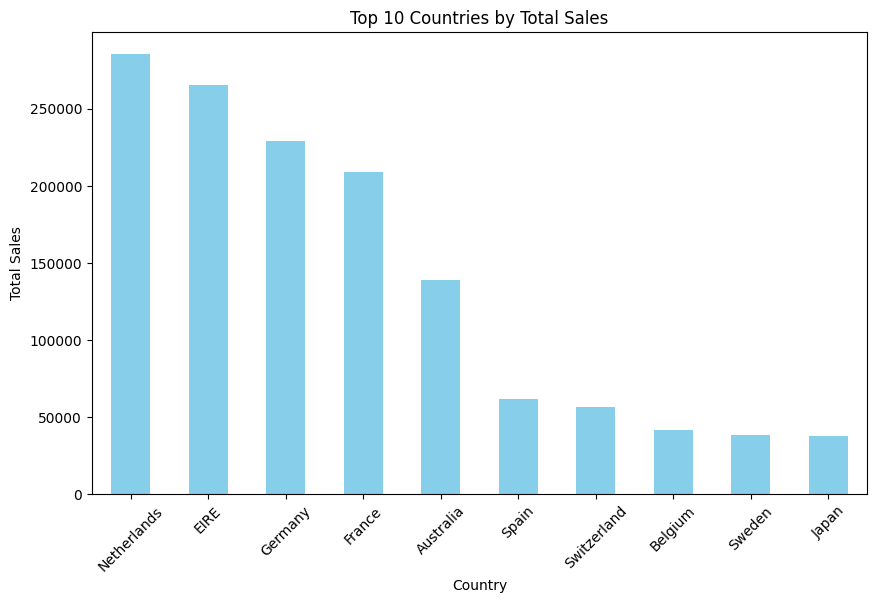

In [16]:
country_sales = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
country_sales[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


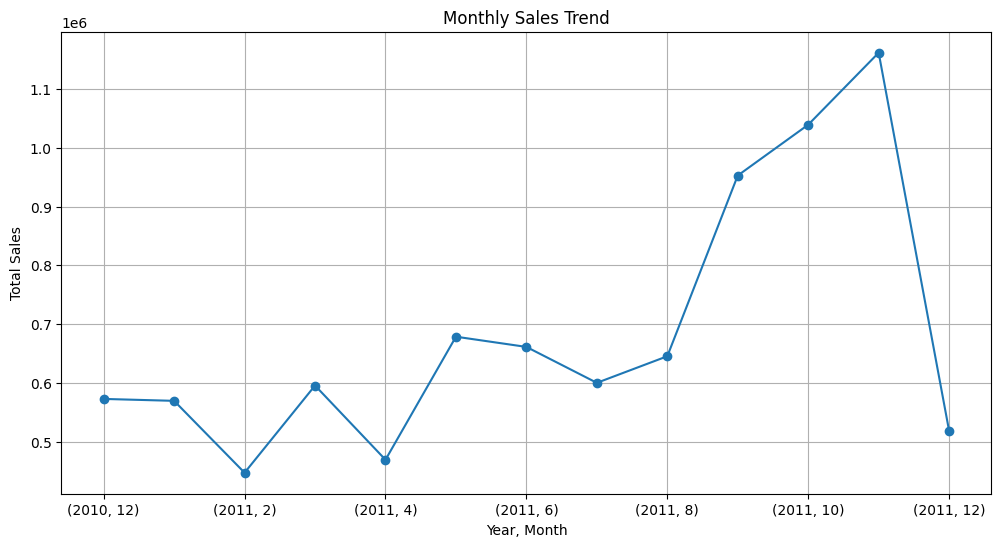

In [17]:
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Year, Month')
plt.grid()
plt.show()


In [18]:
# Importing essential libraries for data visualization and numerical analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enabling inline plots for Jupyter Notebook
%matplotlib inline

# Setting a consistent style for all seaborn plots
sns.set(style="whitegrid")


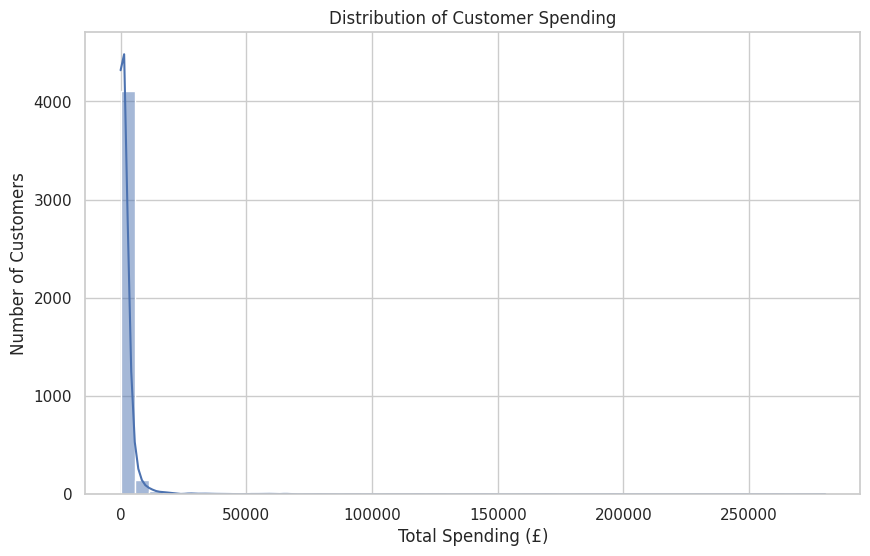

In [19]:
# Grouping data by CustomerID to calculate total spending
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

# Plotting histogram of total spending per customer
plt.figure(figsize=(10,6))
sns.histplot(customer_spending, bins=50, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending (£)')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-20-f07ab53061be>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()


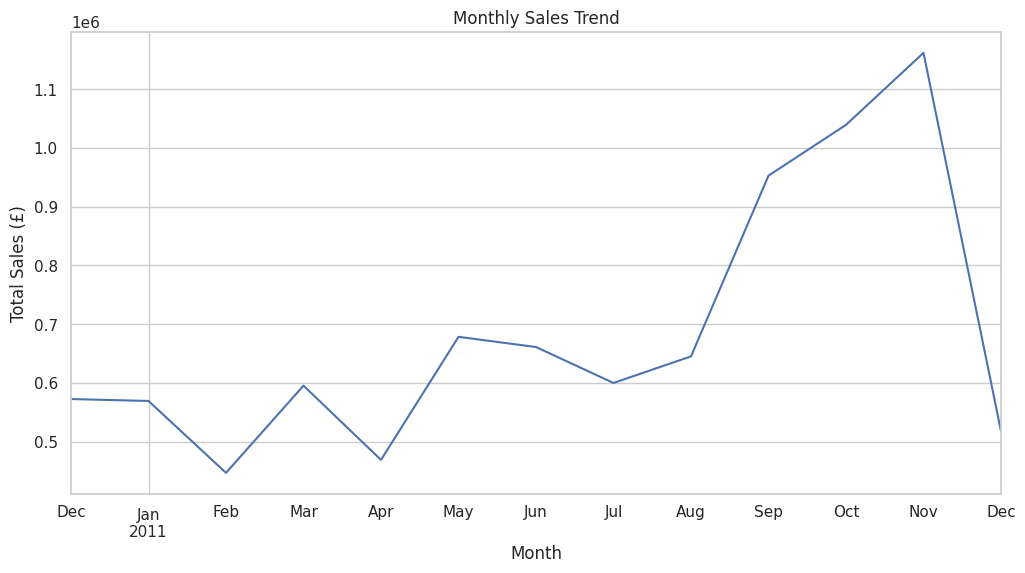

In [20]:
# Grouping data by InvoiceDate (month level) to see sales trends
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

# Plotting the line plot for monthly sales
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.show()


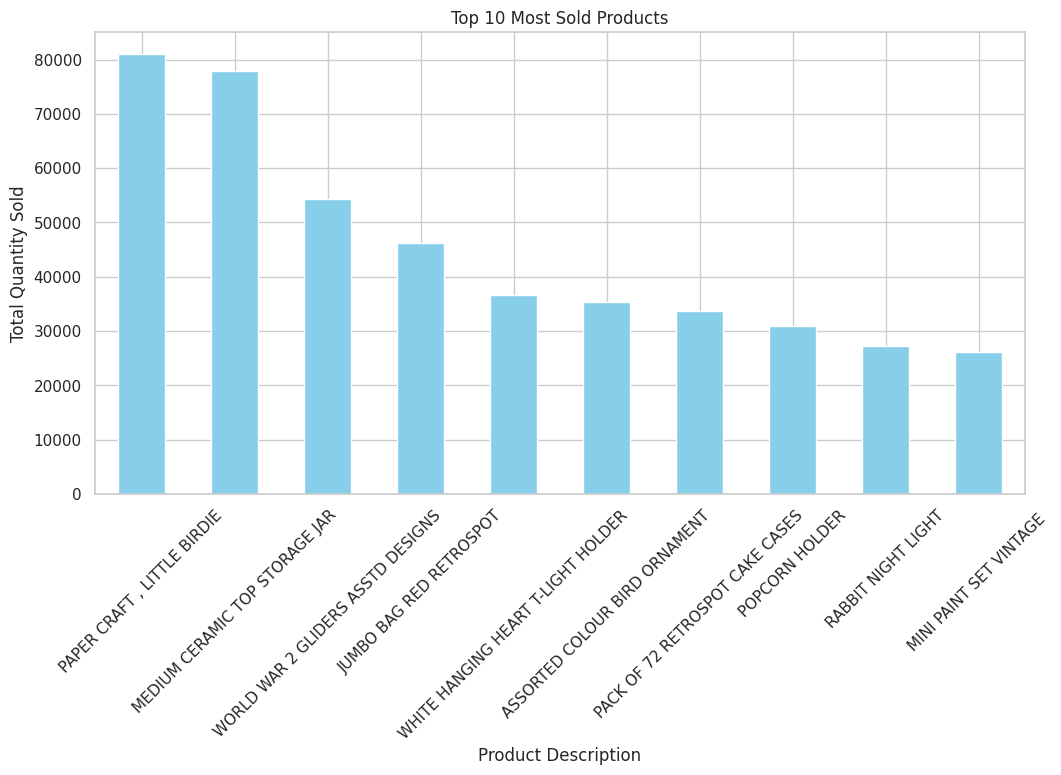

In [21]:
# Finding top 10 selling products by quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


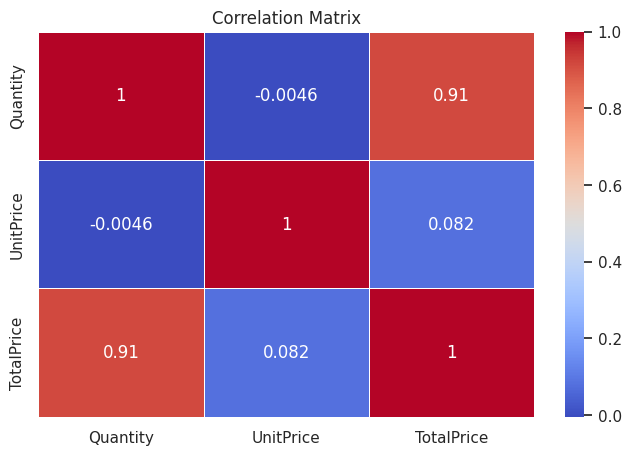

In [22]:
# Selecting numerical columns for correlation
numerical_cols = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Calculating correlation matrix
correlation_matrix = numerical_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [23]:
# Selecting features for customer segmentation
customer_features = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Normalizing the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

# Checking the scaled features
customer_features_scaled[:5]  # Displaying first 5 rows for verification


array([[-0.03896826, -0.02563543, -0.02296239],
       [-0.03896826,  0.01237732, -0.00665544],
       [-0.02781573, -0.01658477, -0.0012845 ],
       [-0.03896826,  0.01237732, -0.00665544],
       [-0.03896826,  0.01237732, -0.00665544]])

In [24]:
# Importing KMeans from sklearn
from sklearn.cluster import KMeans

# Applying K-Means clustering (let's start with 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(customer_features_scaled)

# Checking the first few rows to see the assigned clusters
df[['CustomerID', 'Cluster']].head()


,CustomerID,Cluster
0,17850.0,0
1,17850.0,0
2,17850.0,0
3,17850.0,0
4,17850.0,0


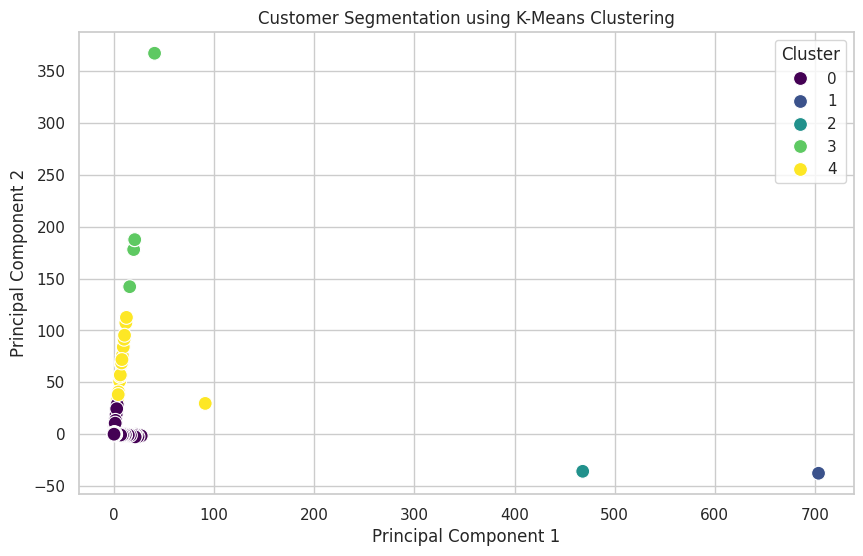

In [25]:
# Importing PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Reducing the features to 2 principal components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_features_scaled)

# Adding PCA components to the dataframe for visualization
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


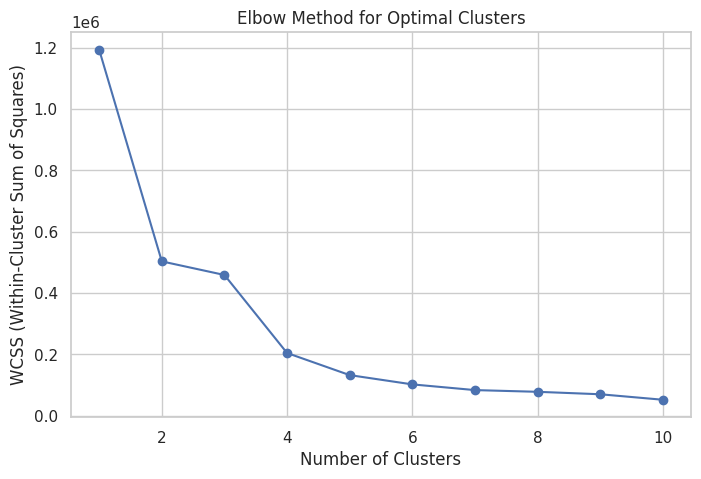

In [26]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [27]:
# Descriptive statistics for each segment
segment_summary = df.groupby('Cluster').agg({
    'Quantity': ['mean', 'std', 'min', 'max'],
    'UnitPrice': ['mean', 'std', 'min', 'max'],
    'TotalPrice': ['mean', 'std', 'min', 'max']
}).reset_index()

# Displaying the summary for each cluster
print(segment_summary)


  Cluster      Quantity                            UnitPrice               \
                   mean       std    min    max         mean          std   
0       0     12.598880  42.88734      1   4800     2.974817     6.071119   
1       1  80995.000000       NaN  80995  80995     2.080000          NaN   
2       2  74215.000000       NaN  74215  74215     1.040000          NaN   
3       3      1.000000   0.00000      1      1  4714.028000  1960.871436   
4       4      3.565217  12.30235      1     60  1429.756087   542.093158   

                         TotalPrice                                      
        min      max           mean          std         min        max  
0     0.001   700.00      21.543028    70.637608       0.001    7144.72  
1     2.080     2.08  168469.600000          NaN  168469.600  168469.60  
2     1.040     1.04   77183.600000          NaN   77183.600   77183.60  
3  3155.950  8142.75    4714.028000  1960.871436    3155.950    8142.75  
4   649.500  250

<ipython-input-28-7469f32916e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalPrice', data=df, palette='Set2')


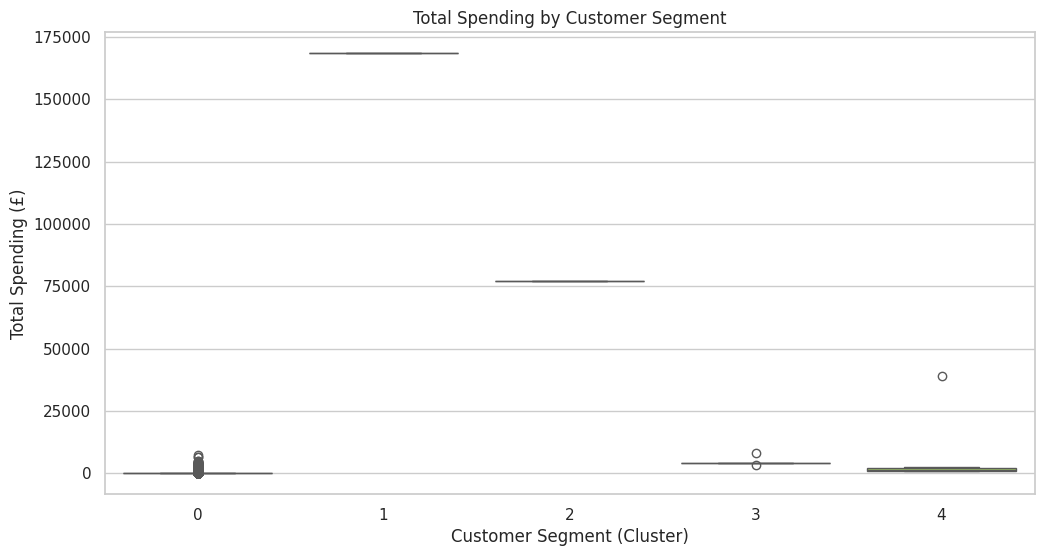

<ipython-input-28-7469f32916e5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Quantity', data=df, palette='Set2')


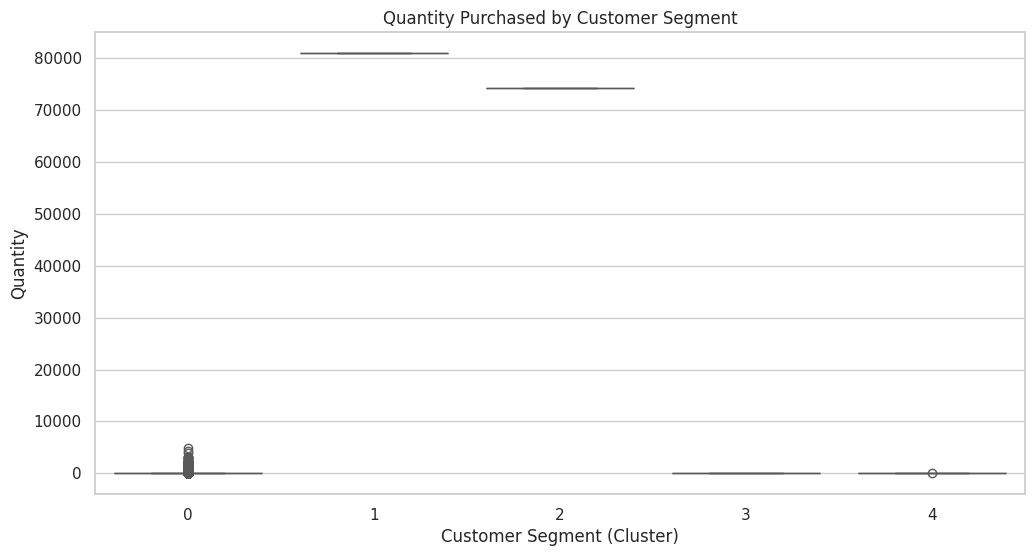

In [28]:
# Plotting the distribution of Total Spending for each cluster
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='TotalPrice', data=df, palette='Set2')
plt.title('Total Spending by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Total Spending (£)')
plt.show()

# Plotting the distribution of Quantity for each cluster
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='Quantity', data=df, palette='Set2')
plt.title('Quantity Purchased by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Quantity')
plt.show()


In [31]:
# Grouping by Cluster and calculating the mean for relevant columns
segment_profile = df.groupby('Cluster').agg({
    'Quantity': ['mean', 'std', 'min', 'max'],  # Purchases
    'UnitPrice': ['mean', 'std', 'min', 'max'],  # Price per unit
    'TotalPrice': ['mean', 'std', 'min', 'max']  # Total spending
}).reset_index()

# Displaying the segment profile
print(segment_profile)


  Cluster      Quantity                            UnitPrice               \
                   mean       std    min    max         mean          std   
0       0     12.598880  42.88734      1   4800     2.974817     6.071119   
1       1  80995.000000       NaN  80995  80995     2.080000          NaN   
2       2  74215.000000       NaN  74215  74215     1.040000          NaN   
3       3      1.000000   0.00000      1      1  4714.028000  1960.871436   
4       4      3.565217  12.30235      1     60  1429.756087   542.093158   

                         TotalPrice                                      
        min      max           mean          std         min        max  
0     0.001   700.00      21.543028    70.637608       0.001    7144.72  
1     2.080     2.08  168469.600000          NaN  168469.600  168469.60  
2     1.040     1.04   77183.600000          NaN   77183.600   77183.60  
3  3155.950  8142.75    4714.028000  1960.871436    3155.950    8142.75  
4   649.500  250

<ipython-input-32-adc79384c80a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalPrice', data=df, palette='Set2')


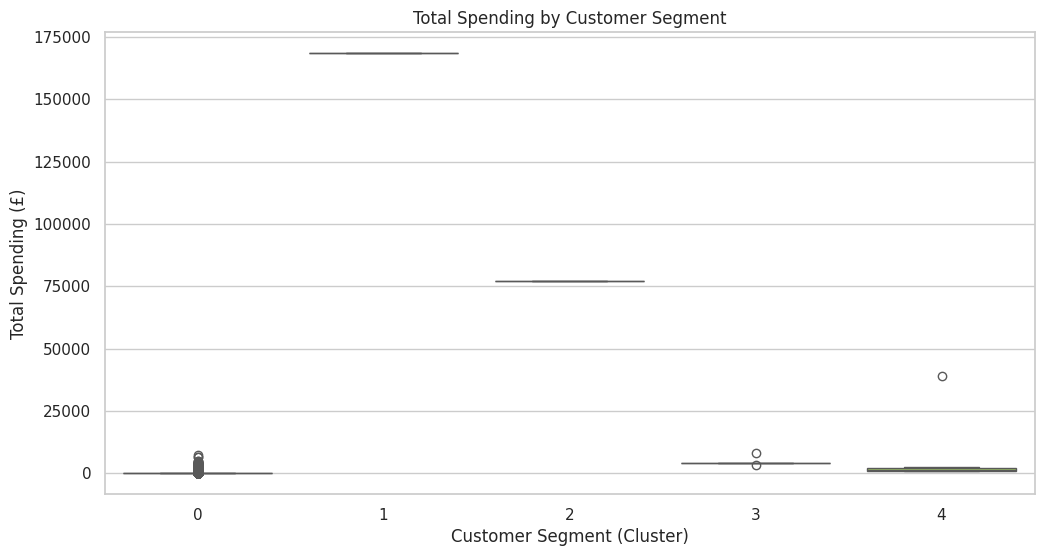

<ipython-input-32-adc79384c80a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Quantity', data=df, palette='Set2')


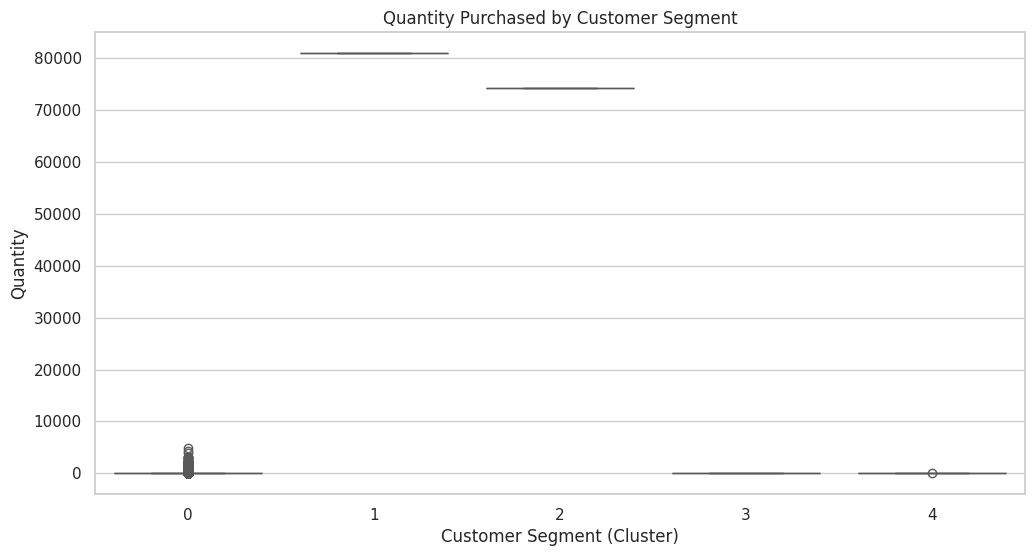

In [32]:
# Boxplot for Total Spending across clusters
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='TotalPrice', data=df, palette='Set2')
plt.title('Total Spending by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Total Spending (£)')
plt.show()

# Boxplot for Quantity purchased across clusters
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='Quantity', data=df, palette='Set2')
plt.title('Quantity Purchased by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Quantity')
plt.show()


In [33]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Recency: How recently did the customer make a purchase?
# Get the last purchase date
last_purchase_date = df['InvoiceDate'].max()

# Calculate recency (days since last purchase for each customer)
df['Recency'] = (last_purchase_date - df['InvoiceDate']).dt.days

# Frequency: How often does the customer make a purchase?
# Count the number of transactions per customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary: How much did the customer spend?
# Calculate the total spending for each customer
monetary = df.groupby('CustomerID')['TotalPrice'].sum()

# Merging all three features into a single dataframe
rfm_df = pd.DataFrame({
    'Recency': df.groupby('CustomerID')['Recency'].min(),
    'Frequency': frequency,
    'Monetary': monetary
})

# View the RFM data
rfm_df.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [36]:
# Simple CLV Calculation (Frequency * Monetary)
rfm_df['CLV'] = rfm_df['Frequency'] * rfm_df['Monetary']

# Display the CLV values for each customer
rfm_df[['Recency', 'Frequency', 'Monetary', 'CLV']].head()



,Recency,Frequency,Monetary,CLV
CustomerID,,,,
12346.0,325,1,77183.60,77183.60
12347.0,1,7,4310.00,30170.00
12348.0,74,4,1797.24,7188.96
12349.0,18,1,1757.55,1757.55
12350.0,309,1,334.40,334.40


In [37]:
# Displaying the top 10 customers with highest CLV
top_customers = rfm_df[['Recency', 'Frequency', 'Monetary', 'CLV']].sort_values(by='CLV', ascending=False).head(10)
print(top_customers)


            Recency  Frequency   Monetary          CLV
CustomerID                                            
14911.0           0        201  143825.06  28908837.06
14646.0           1         73  280206.02  20455039.46
18102.0           0         60  259657.30  15579438.00
17450.0           7         46  194550.79   8949336.34
12748.0           0        209   33719.73   7047423.57
14156.0           9         55  117379.63   6455879.65
13089.0           2         97   58825.83   5706105.51
15311.0           0         91   60767.90   5529878.90
16029.0          38         63   81024.84   5104564.92
17841.0           1        124   40991.57   5082954.68
